In [74]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper as arabic_reshaper
from bidi.algorithm import get_display
import operator


In [149]:
df=pd.read_csv(r'test.csv')


In [76]:
def isNan(str):
    return str!=str

Getting the best 5 actors through specific decades depending on number of movies they participated in

In [162]:
def best_actors_during_specific_decade(df,decade):
    actors=list(df.get("تمثيل"))
    date=list(df.get("تاريخ العرض"))
    dic={}
    
    l=int(decade[0:4])
    r=l+10
    
    for i in range(len(actors)):
        if date[i]>=l and date[i]<r and not isNan(actors[i]): 
            temp=actors[i].split(",")
            for j in temp:
                if j in dic:
                    dic[j]+=1
                else:
                    dic[j]=1
    
    
    dic = dict( sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
    actors=[]
    num=[]
    for k,v in dic.items():
        actors.append(get_display(arabic_reshaper.reshape(k)))
        num.append(v)
    actors=actors[0:10]
    num=num[0:10]
    
    
    df = pd.DataFrame({'group':actors, 'values':num})
    df.reset_index(inplace=True)

    fig, ax = plt.subplots(figsize=(10,8), dpi= 80)

    my_range=range(1,len(df.index)+1)
    
    # Title, Label, Ticks and Ylim
    ax.set_title(get_display(arabic_reshaper.reshape("أحسن 10 فنانين بالنسبة لعدد الافلام التى شاركوا بها خلال العقد"+str(l))), fontdict={'size':22})
    ax.set_ylabel(get_display(arabic_reshaper.reshape("عدد الأفلام")))
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.group, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})

    for row in df.itertuples():
        ax.text(row.Index, row.values,s=row.values ,horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

    # Make the plot
    plt.stem(df['values'],use_line_collection=True)
    plt.xticks( my_range, df['group'])

    
    
    
    

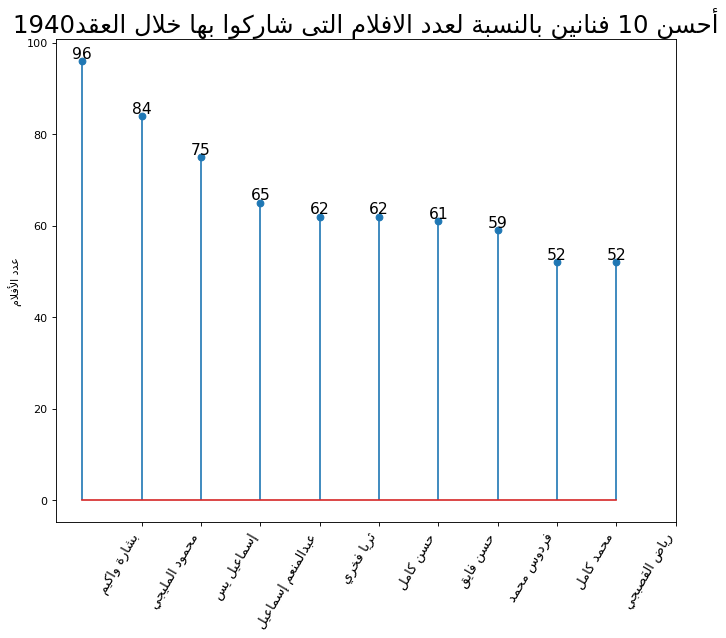

In [163]:
best_actors_during_specific_decade(df,"1940s")